# Minimal Example - Orbits

Import all the necessary (and possibly unnecessary) packages and scripts

In [1]:
import numpy as np
from numpy.linalg import norm
from numpy import dot, sqrt, pi
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.constants as const
from math import atan2

from integrate import orbit,phase
#orbit(r1,r2,v1,v2,m1,m2,t0,tend,N,method,order) -> r1,r2,v1,v2,r,p,H,T
#phase(x,y) -> phi
from evaluate import evaluate,countorbits
#evalate(r1,r2,v1,v2,m1,m2,t0,tend,N) -> lists for all methods of: rcartesian[method,object], r,E,T,v1,v2,phi,numberoforbits
import time as time

Define some constants

In [2]:
area = np.pi*50

#Constants:
Msolar = 1.9885E30

#Gravitational Constant in solar Masses
G = const.G*Msolar
g=G
c = const.c
pc = 3.085677581E16

We are comparing 7 different methods
For each, we define a lable, colour and linestyle

In [3]:
nmethods = 7

In [22]:
labels = ["0PN", "1PN", "2PN", "3PN", "1PM", "2PM", "3PM"]
lc = np.linspace(0,1,nmethods)
colorsmap = cm.viridis(lc)
colors = ["red", "green", "cyan", "#8968CD","orange","magenta", "yellow"]
colors2 = ["darkred", "limegreen", "blue", "#5D478B", "tomato", "darkmagenta", "gold"]
linestyles = ["-", "--", ":", (0,(3,1,3,2,1,2)),(0,(4,3,1,3)),(0,(3,3,1,1,1,3)),(0,(4,2,4,2,1,1,1,2))]

Define Function for Schwarzschild Radius and Velocity (using the virial Theorem)

In [5]:
def v(m,r):
    #Virial Theorem Velocity
    return np.sqrt(G*m/norm(r))

def rs(m):
    #Schwarzschild Radius for mass m
    return 2*G*m/const.c**2

## Example: Equal Mass and short time

In [49]:
#Masses of the 2 Compact Objects
m1 = 10
m2 = 10
#Initial positions for the 2 compact objects. We rotate the system such that z = 0 and look at the x-y plane
r01 = np.array([-100*rs(m1),0])
r02 = np.array([100*rs(m2),0])
#Initial velocities of the 2 COs. This will give an eccentric orbit ...
v01 = np.array([0,0])
v02 = np.array([0,0.6*v(m2,r01-r02)])
#Time duration of integration
t0 = 0
tend = 4
#dt_initial = (tend - t0)/N0, the number of timesteps will be larger than N, because of the adaptive time-step
N0 = 1000

We perform the integration using "$\textbf{evaluate}$":

evaluat(r01,r02,v01,v02,m1,m2,t0,tend,N0)
INPUT:

r01, r02: d-dim arrays

            Initial positions of the 2 COs       
v01, v02: d-dim arrays

            Initial velocities of the 2 COs   
            
m1, m2: float

            Masses of the 2 COs      
t0, tend: float

            Initial and final time of integration
N0: integer

            Is used to define the initial timestep dt_init = (tend-t0)/N0
            The actual number of timesteps N will be larger than N0, because of the adaptive timestep
OUTPUT:

rcartesion: list[ For each method: list[dxN-dim array, dxN-dimarray]]
                    
            List of all methods with a list of the orbits of the cartesian coordinates of the 2 objects 
r: list[ for each method: dxN-dim array]

            For each method: relative coordinates of the orbits

E: list[ for each method: N-dim array]
            
            For each method: Total energy of the system at each time step
            
T: list[ for each method: N-dim array]

            For each method: array with time-point

v1: list[for each method: N-dim array]

            For each method: array with norm of velocity v/c in rest-frame far away of object 1
            
v2: list[for each method: N-dim array]

            For each method: array with norm of velocity v/c in rest-frame far away of object 2
            
phi: list[for each method: N-dim array]
                  
            For each method: phase of the relative coordinate. 0 is the positiv x-axis. Jump from pi -> -pi at negative x-axis

numberoforbits: list[ for each method: float]
            
            For each method: Number of orbits (around origin in relative coordinates), precision up to 0.5


In [50]:
rcart,r,E,T,v1,v2,phi,no = evaluate(r01,r02,v01,v02,m1,m2,t0,tend,N0)

Time to simulate orbits in [s]: 26.16403841972351


Now we can plot whatever we are interested in. 

In [51]:
colorsmap = cm.jet(lc)

Relative Coordinate:

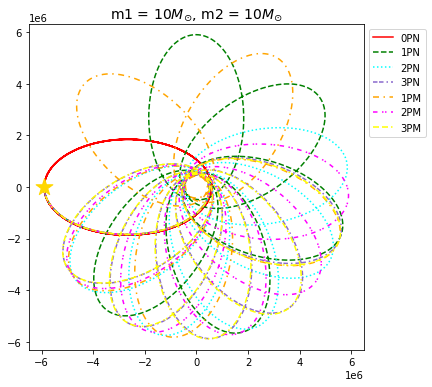

In [52]:
plt.figure(figsize =(6,6))
plt.title(r"m1 = "+str(m1)+"$M_{\odot}$, m2 = "+str(m2)+"$M_{\odot}$", size = 14, pad = 6)
#Initial position of Star/BH
plt.scatter(r[0][0,0], r[0][1,0], s = 2*area, marker = "*", color = "gold", zorder = 10)
for i in range(nmethods):
    plt.plot(r[i][0,:],r[i][1,:], linestyle = linestyles[i], color = colors[i], label = labels[i])
plt.axis('equal')
plt.legend(bbox_to_anchor=(1.2,1))

Velocities

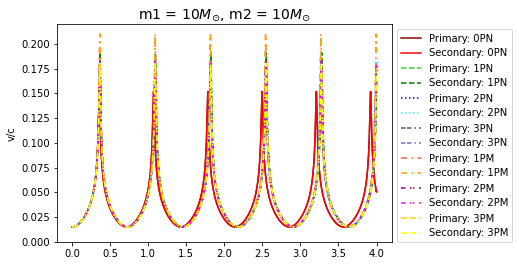

In [53]:
plt.figure()
plt.title(r"m1 = "+str(m1)+"$M_{\odot}$, m2 = "+str(m2)+"$M_{\odot}$", size = 14, pad = 6)

for i in range(nmethods):
    plt.plot(T[i][:],v1[i][:], linestyle = linestyles[i], color = colors2[i], label = "Primary: "+labels[i])
    plt.plot(T[i][:],v2[i][:], linestyle = linestyles[i], color = colors[i], label = "Secondary: "+labels[i])

plt.ylabel("v/c")
plt.ylim(bottom=0)
plt.legend(bbox_to_anchor=(1,1))

The change in Energy (remember that it should be conserved)

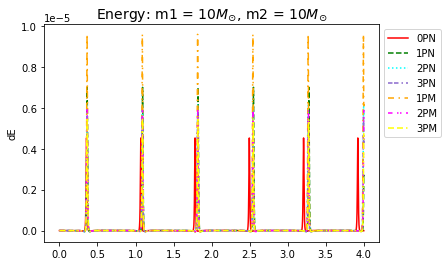

In [54]:
plt.figure()
plt.title(r"Energy: m1 = "+str(m1)+"$M_{\odot}$, m2 = "+str(m2)+"$M_{\odot}$", size = 14, pad = 6)

for i in range(nmethods):
    plt.plot(T[i][:],E[i][:]/E[i][0]-1, linestyle = linestyles[i], color = colors[i], label = labels[i])

plt.ylabel("dE")
plt.legend(bbox_to_anchor=(1,1))

The Velocity and the timestep (here for 3PM), to see how the adaptive time-step works

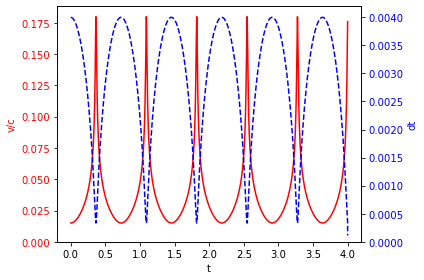

In [55]:
fig,ax1 = plt.subplots()
color = "red"
ax1.set_xlabel("t")
ax1.set_ylabel("v/c", color = color)
ax1.plot(T[6][:-1],v2[6][:-1], color = color)
ax1.tick_params(axis = "y", labelcolor = color)
ax1.set_ylim(bottom=0)
ax2 = ax1.twinx()
color = "blue"
ax2.set_ylabel("dt", color = color)
ax2.plot(T[6][:-1],T[6][1:]-T[6][:-1], color = color, linestyle = "dashed")
ax2.tick_params(axis="y", labelcolor = color)
ax2.set_ylim(bottom=0)
fig.tight_layout()

We can also print the number of orbits
When we count the orbits, we assume that the relative coordinate starts with a negative value on the x-axis.
This is achieved if in the initial conditions the y-component equals zero and the primary lies left (negative) of the origin and the primary lies right (positiv)

Number of Orbits:
0PN 5.5
Rest Phase/pi: 0.7926320633419143
1PN 6.0
Rest Phase/pi: -0.736098040584907
2PN 6.0
Rest Phase/pi: -0.7449017518681351
3PN 6.0
Rest Phase/pi: -0.8378659070615042
1PM 6.5
Rest Phase/pi: 0.7142233696846423
2PM 6.0
Rest Phase/pi: -0.9602756506880993
3PM 5.5
Rest Phase/pi: 0.8223215003724554


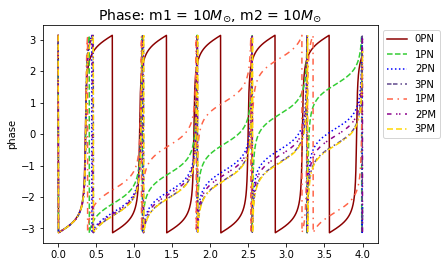

In [62]:
print("Number of Orbits:")
for i in range(nmethods):
    print(labels[i], no[i])
    print("Rest Phase/pi:", phi[i][-1]/np.pi)
    
plt.figure()
plt.title(r"Phase: m1 = "+str(m1)+"$M_{\odot}$, m2 = "+str(m2)+"$M_{\odot}$", size = 14, pad = 6)

for i in range(nmethods):
    plt.plot(T[i][:],phi[i][:], linestyle = linestyles[i], color = colors2[i], label = labels[i])

plt.ylabel("phase")
plt.legend(bbox_to_anchor=(1,1))

### Example: Long Time Evolution

In [63]:
m1 = 10
m2 = 1
r01 = np.array([-1000*rs(m2),0])
r02 = np.array([1000*rs(m2),0])
v01 = np.array([0,0])
v02 = np.array([0,0.6*v(m1,r01-r02)])
t0 = 0
tend = 500
N = 100000

In [65]:
rcart_l,r_l,E_l,T_l,v1_l,v2_l,phi_l,no_l = evaluate(r01,r02,v01,v02,m1,m2,t0,tend,N)

Time to simulate orbits in [s]: 2191.3066172599792


If we plot the full orbits, this will get messy ... so we only look at the last 1/80 orbits

In [66]:
ratio = 79/80
n = [int(ratio*len(T_l[i])) for i in range(nmethods)]

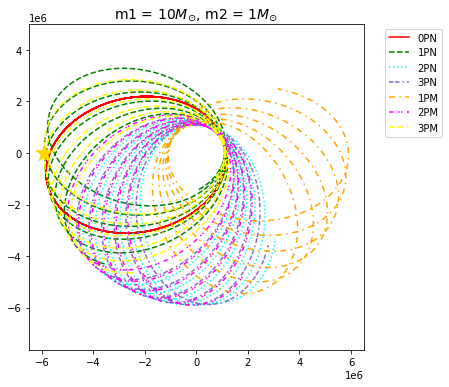

In [69]:
plt.figure(figsize = (6,6))
plt.title(r"m1 = "+str(m1)+"$M_{\odot}$, m2 = "+str(m2)+"$M_{\odot}$", size = 14, pad = 6)

for i in range(nmethods):
    plt.plot(r_l[i][0,n[i]:],r_l[i][1,n[i]:], linestyle = linestyles[i], color = colors[i], label = labels[i])
plt.scatter(r_l[0][0,0], r_l[0][1,0], s = 2*area, marker = "*", color = "gold", zorder = 10)
plt.axis('equal')
plt.legend(bbox_to_anchor=(1.25,1))

We observe that the Newtonian orbit precesses ... this indicates, that we need smaller timesteps to reach the required precision 

In [71]:
print("Number of Orbits:")
for i in range(nmethods):
    print(labels[i], no_l[i])

Number of Orbits:
0PN 458.0
1PN 467.0
2PN 466.0
3PN 466.0
1PM 470.5
2PM 466.0
3PM 466.0
